# Neural Network with Keras

We have made a lot of effort to program our neural network that is able to classify differenr handwritten number with the help of numpy. A lot of other people did that already and since this is the basis for many applications nowadays, a large number of API (application programming interfaces) exist. Python plays therby a leading role. 
We will use in the follwing the interface provided by the `keras` module. `keras` is actually sitting on top of the real machine learning API, which is in our case `tensorflow`. `keras` makes the use of tensorflow a bit more friendly and from the example below, you wil recognize by how much shorter our code gets with the keras and tensorflow API.

In [4]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from keras import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 18,
                     'axes.titlesize': 20,
                     'axes.labelsize': 20,
                     'axes.labelpad': 1,
                     'lines.linewidth': 2,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in'
                    })

## MNIST Data Set (Keras)

This loads the same data as in our previous notebook, except that the function to do that is directly provided by `keras`.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

# one-hot encoding
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

11501568/11490434 [==============================] - 1s 0us/step


## Build the model

The next few lines create the whole neural network with an input layer, a hidden layer with 64 neurons and and output layer with 10 neurons.

In [6]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28 * 28, )),
    Dense(10, activation='softmax')
])

2023-07-10 17:29:59.744123: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-07-10 17:29:59.744148: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jupy
2023-07-10 17:29:59.744153: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jupy
2023-07-10 17:29:59.744238: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.199.2
2023-07-10 17:29:59.744256: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.182.3
2023-07-10 17:29:59.744260: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.182.3 does not match DSO version 470.199.2 -- cannot find working devices in this configuration
2023-07-10 17:29:59.745231: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow bin

## Compile the model

The `compile` method assembles everything to create a model for training. You can specify here the stochastic gradient descent method in the same way as the loss function.

In [7]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Finally, the `fit` method allows us to train the model for a specified number of epochs.

In [8]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-07-10 17:30:24.796532: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 560us/step - loss: 1.5069 - accuracy: 0.6892
Epoch 2/10
1875/1875 [==============================] - 1s 554us/step - loss: 0.7578 - accuracy: 0.8420
Epoch 3/10
1875/1875 [==============================] - 1s 579us/step - loss: 0.5553 - accuracy: 0.8697
Epoch 4/10
1875/1875 [==============================] - 1s 558us/step - loss: 0.4683 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 1s 557us/step - loss: 0.4195 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 1s 551us/step - loss: 0.3882 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 1s 557us/step - loss: 0.3660 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 1s 553us/step - loss: 0.3492 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 1s 548us/step - loss: 0.3358 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 1s 553us/step - lo

## Testing the model

We may now use our trained model to predict the number in the image with the `model.predict` function. This delivers an array of 10 numbers, which represent the confidences that the number $0,\ldots,9$ are contained. The index of the biggest number thus represents the number contained in the image.

prediction:  4


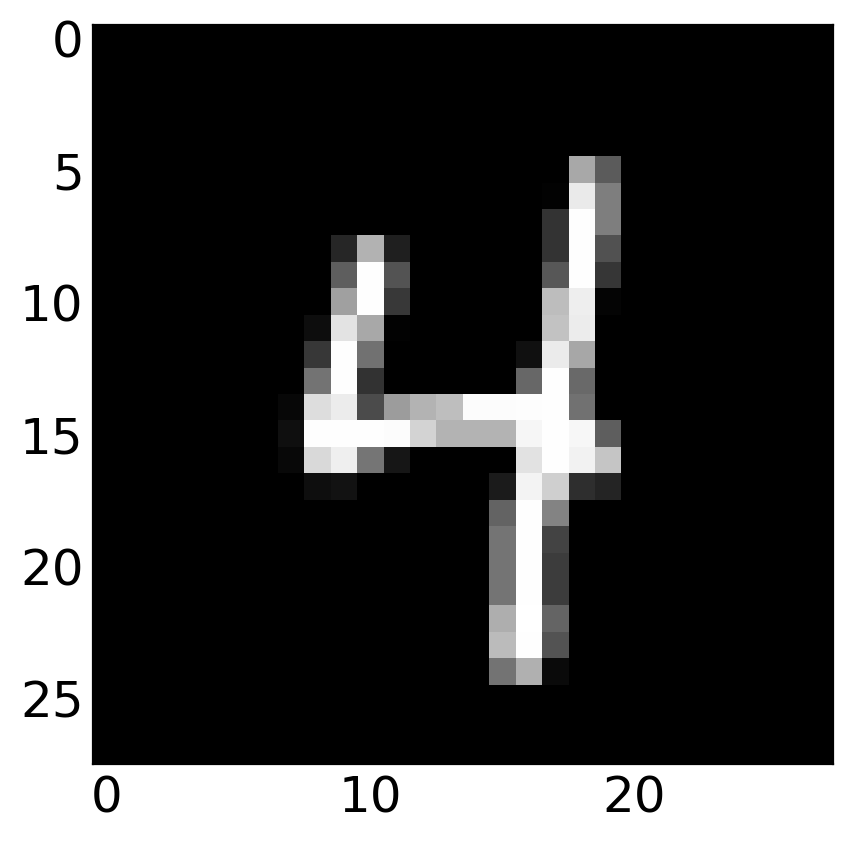

In [11]:
i=19
plt.imshow(x_test[i,:].reshape(28,28), cmap='gray')
print("prediction: ",np.argmax(model.predict(x_test[i,:].reshape(1,784))))